<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [257]:
#Import cleaned and transformed data with redundant columns dropped
breast_cancer_csv = pd.read_csv(r'/Users/annaxu/Documents/Data Science/DATA/breast-cancer-wisconsin-data-Dropped.csv', index_col = 0)
breast_cancer_csv.head()

,diagnosis,texture_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,symmetry_worst
0,1,1.016197,-0.616364,0.280553,0.913242,0.967381,156.274418,33.300033,0.183640,-1.818925,-0.176787,-0.337148
1,1,1.249687,-0.741842,0.238055,1.839926,0.902012,191.387560,71.994240,0.152291,-2.089088,-0.729088,-0.560667
2,1,1.327359,-0.684240,0.244929,1.341202,0.923223,162.601626,44.444444,0.165960,-1.935168,-0.372122,-0.442132
3,1,1.309204,-0.585528,0.312154,2.017756,1.049508,109.769484,16.770082,0.209599,-1.561601,-0.062332,-0.177963
4,1,1.156549,-0.742561,0.242549,1.320655,0.921028,87.032202,56.947608,0.172299,-1.984859,-0.688246,-0.626353


### 2. EDA

Explore dataset. Clean data. Find correlation.

In [326]:
#Check features correlation with the target variable
breast_cancer_csv.corr()['diagnosis']

diagnosis                 1.000000
texture_mean              0.426002
symmetry_mean             0.342299
fractal_dimension_mean   -0.002614
radius_se                -0.572837
texture_se                0.020275
smoothness_se             0.049858
symmetry_se               0.077015
fractal_dimension_se      0.156326
smoothness_worst          0.427359
compactness_worst         0.600305
symmetry_worst            0.430123
Name: diagnosis, dtype: float64

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [321]:
#Set target variable
y = breast_cancer_csv['diagnosis']
#Check number of classes
y.value_counts()

diagnosis
0    353
1    209
Name: count, dtype: int64

In [323]:
#2 classes: 0 = Benign and 1 = Malignant.

### 4. What is the baseline accuracy?

In [266]:
#Baseline accuracy is the accuracy you'd get if you always predict the majority class
baseline_accuracy = breast_cancer_csv['diagnosis'].value_counts().max() / len(breast_cancer_csv)
print('Baseline accuracy: {:.2%}'.format(baseline_accuracy))

Baseline accuracy: 62.81%


### 5. Choose features to be your predictor variables and set up your X.

In [269]:
#Set predictor variables
X = breast_cancer_csv.loc[:, breast_cancer_csv.columns != 'diagnosis']

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [272]:
#Create and fit a KNN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline? Yes.
- Is it legitimate? No, with k = 1, the model is just picking the closest neighbour leading to overfitting and the model will not perform well with unseen data.

In [275]:
#Predict y
y_pred_class = knn.predict(X)

#Compute model accuracy
print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y, y_pred_class)))

Accuracy: 100.00%


### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [329]:
#Create an 80-20 train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)
#Create and fit a KNN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
#Predict y and compute model accuracy
y_pred_class = knn.predict(X_test)
print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred_class)))

Accuracy: 66.37%


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [331]:
#Get number of rows in the training data
k = len(X_train)
print('No. of rows in the training data: ' + str(k))
#Create and fit a KNN model where k = no. of rows in the training data
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
#Predict y and compute model accuracy
y_pred_class = knn.predict(X_test)
print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred_class)))

No. of rows in the training data: 449
Accuracy: 61.06%


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

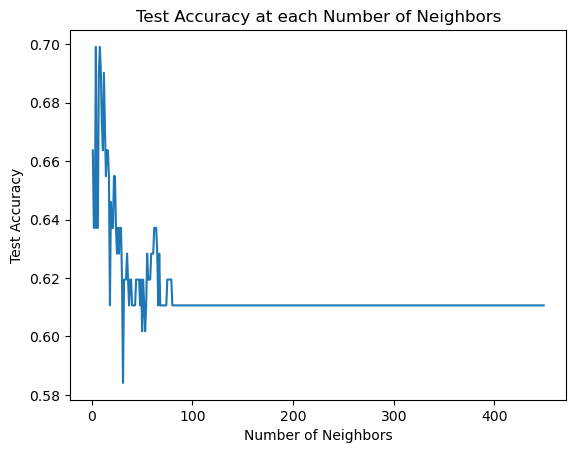

In [284]:
#Get accuracy for KNN at range K = 1 to K = no. of rows in the training data
accuracy = [] #Create an empty list
for k in range(1, len(X_train)+1): #Loop through the range
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred_class)
    accuracy.append(score) #Append accuracy score to the list

#Plot the test accuracy at each value of k
plt.plot(list(range(1, len(X_train)+1)), accuracy)
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy at each Number of Neighbors')
plt.show()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


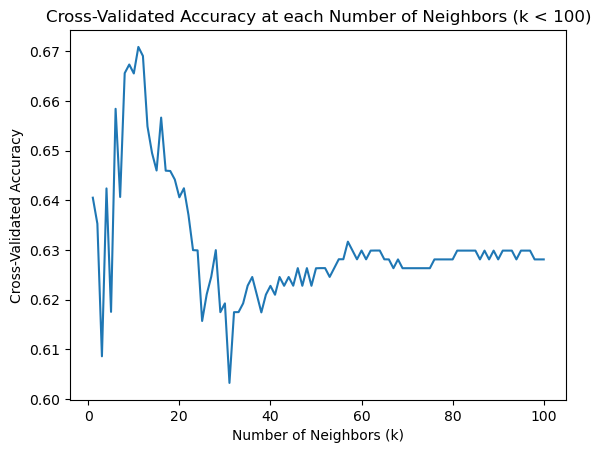

In [338]:
#Restate X and y
X = breast_cancer_csv.loc[:, breast_cancer_csv.columns != 'diagnosis']
y = breast_cancer_csv['diagnosis']

#Perform 5-fold cross-validation on the KNN model
cross_validated_accuracy = [] #Create an empty list
for k in range(1, 101): #Use range 1-100 as above plot showed accuracy flattening after k = 100
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5) #Split full dataset into 5 folds and perform KNN on each fold
    cross_validated_accuracy.append(np.mean(scores)) #Get mean score and append to list

#Plot the mean cross-validated accuracy at each value of k
plt.plot(list(range(1, 101)), cross_validated_accuracy)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy at each Number of Neighbors (k < 100)')
plt.show()

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [297]:
#Standardise the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Restate the target variable
y = breast_cancer_csv['diagnosis']

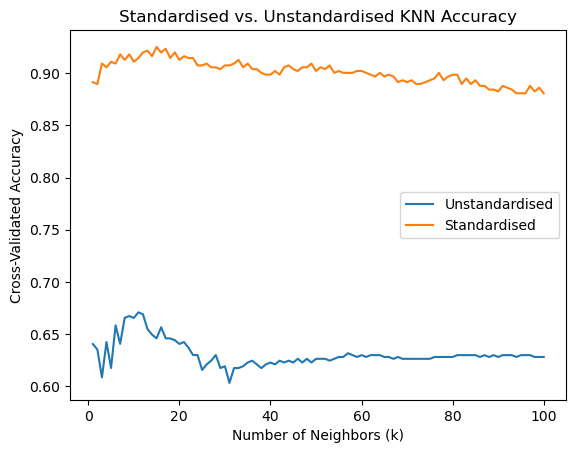

In [344]:
#Perform 5-fold cross-validation on the KNN model with standardised data
standardised_cv_accuracy = []
for k in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5)
    standardised_cv_accuracy.append(np.mean(scores))

#Plot the mean cross-validated accuracy for standardised vs unstandardised data
plt.plot(list(range(1, 101)), cross_validated_accuracy, label = 'Unstandardised')
plt.plot(list(range(1, 101)), standardised_cv_accuracy, label = 'Standardised')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Standardised vs. Unstandardised KNN Accuracy')
plt.legend()
plt.show()

In [ ]:
#KNN accuracy of standardised data is much better and smoother than unstandardised because it minimises bias from large and/or correlated features.

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



